In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import h5py
import numpy as np
import matplotlib.pyplot as plt

from batch import batchsampler

In [2]:
import numpy as np
np.eye(3, dtype=float)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [3]:
np.arange(0, 3)

array([0, 1, 2])

## Visualizing MFCC Data

In [4]:
hdfname = 'ami_train.hdf5'

lengths, nframes = list(), list()
nsegments = {}
nseconds = {}

with h5py.File(hdfname, 'r') as f:
    maxlength = 0.0
    maxshape = (0, 0)
    for ilabel in f.keys():
        for jseg in f[ilabel].keys():
            lengths.append(f[ilabel][jseg].attrs['length'])
            nframes.append(f[ilabel][jseg].shape[0])

            if f[ilabel][jseg].attrs['length'] > maxlength:
                maxlength = f[ilabel][jseg].attrs['length']
                maxshape = f[ilabel][jseg].shape

            if ilabel not in nsegments:
                nsegments[ilabel] = 0
                nseconds[ilabel] = f[ilabel][jseg].attrs['length']
                
            else:
                nsegments[ilabel] += 1
                nseconds[ilabel] += f[ilabel][jseg].attrs['length']
f.close()

longest segment: 57.5600625 (5757, 36)


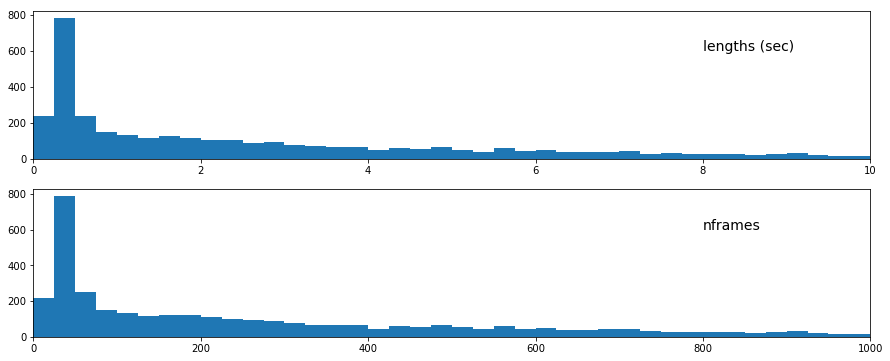

In [5]:
print('longest segment:', maxlength, maxshape)

nrows = 2
fig, ax = plt.subplots(nrows=nrows, ncols=1)
fig.set_figwidth(15)
fig.set_figheight(nrows * 3)

ax[0].hist(np.array(lengths), bins = np.arange(0, 55, 0.25)) 
ax[0].text(8, 600, 'lengths (sec)', fontsize=14)
ax[0].set_xlim(left = 0, right = 10)
ax[1].hist(np.array(nframes), bins = np.arange(0, 5500, 25)) 
ax[1].text(800, 600, 'nframes', fontsize=14)
ax[1].set_xlim(left = 0, right = 1000)
pass;

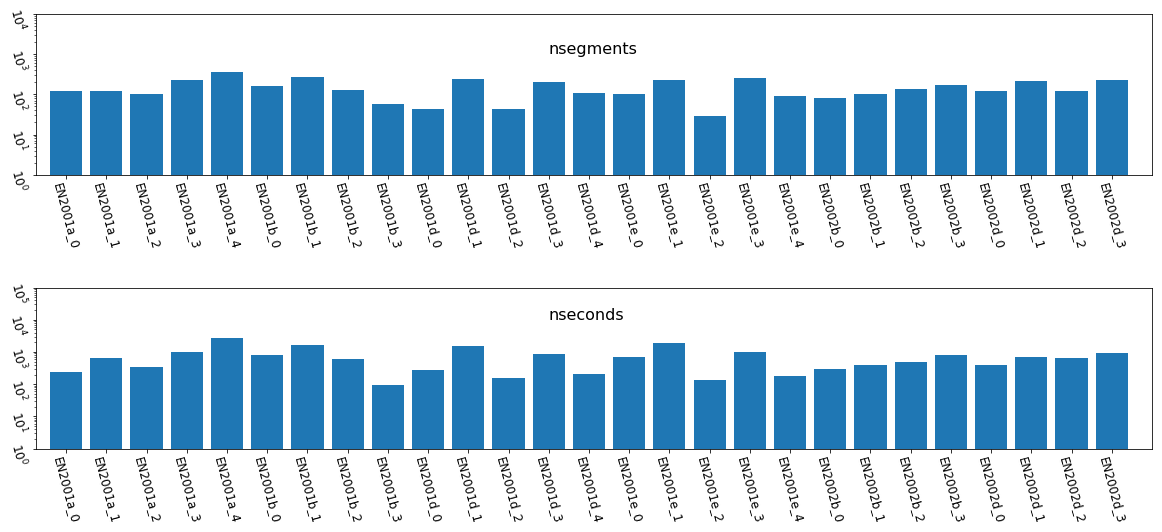

In [6]:
segnames = list(nsegments.keys())
segvalues = list(nsegments.values())

secnames = list(nseconds.keys())
secvalues = list(nseconds.values())

nrows = 2
fig, ax = plt.subplots(nrows=nrows, ncols=1)
fig.set_figwidth(20)
fig.set_figheight(nrows * 4)

ax[0].bar(segnames, segvalues) 
ax[0].text(12, 1000, 'nsegments', fontsize=16)
ax[0].set_yscale('log')
ax[0].tick_params(labelrotation=-75., labelsize = 'large')
ax[0].set_xlim(left = -0.75, right = 27)
ax[0].set_ylim(bottom = 1, top = 10**4)
ax[1].bar(secnames, secvalues) 
ax[1].text(12, 10000, 'nseconds', fontsize=16)
ax[1].set_yscale('log')
ax[1].set_xlim(left = -0.75, right = 27)
ax[1].set_ylim(bottom = 1, top = 10**5)
ax[1].tick_params(labelrotation=-75., labelsize = 'large')
fig.subplots_adjust(hspace=0.7);
pass;

In [7]:
test = batchsampler('ami_train.hdf5', batchdim = [8, 8])

In [8]:
mybatch = test.getbatch()
test.nepoch

0

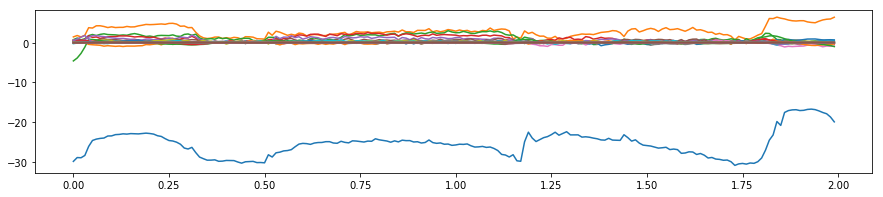

In [9]:
testfeature = mybatch[0][63]
testshape = testfeature.shape
testlength = testshape[0]*0.01

nrows = 1
fig, ax = plt.subplots(nrows=nrows, ncols=1)
fig.set_figwidth(15)
fig.set_figheight(nrows * 3)

time = np.arange(0, testlength, testlength/testshape[0])
for i in range(testfeature.shape[1]):
    ax.plot(time, testfeature[:, i]) 
# ax.text(0.85*np.amax(time), -12, 'test segment', fontsize=14)
pass;